In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

original = pywt.data.camera()
titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL,(LH,HL,HH) = coeffs2

fig = plt.figure(figsize = (12,3))
for i, a in enumerate([LL,LH,HL,HH]):
    ax = fig.add_subplot(1,4,i+1)
    ax.imshow(a, interpolation = "nearest", cmap = plt.cm.gray)
    ax.set_title(titles[i], fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'pywt'

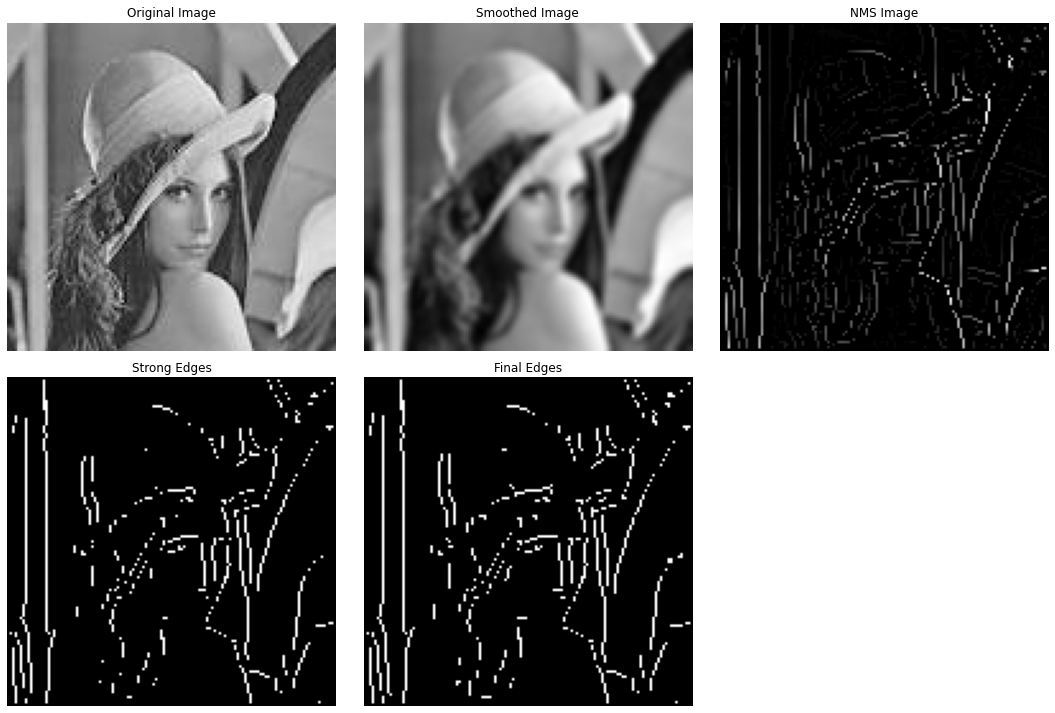

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles):
    """Display a list of images with corresponding titles."""
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def canny_edge_detection(image_path):
    # Step 1: Load the image and apply Gaussian filter
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # Step 2: Find intensity gradients using Sobel operator
    grad_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

    # Step 3: Apply Non-Maximum Suppression
    nms_image = np.zeros_like(magnitude)
    height, width = magnitude.shape

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the angle of the gradient
            angle_i = angle[i, j]
            if (0 <= angle_i < 22.5) or (157.5 <= angle_i <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif (22.5 <= angle_i < 67.5):
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif (67.5 <= angle_i < 112.5):
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            else:  # (112.5 <= angle_i < 157.5)
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms_image[i, j] = magnitude[i, j]

    # Step 4: Apply Double Threshold
    high_threshold = np.max(nms_image) * 0.3
    low_threshold = high_threshold * 0.5
    strong_edges = (nms_image > high_threshold)
    weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

    # Step 5: Track edges by hysteresis
    final_edges = np.zeros_like(nms_image)
    strong_row, strong_col = np.where(strong_edges)
    for i, j in zip(strong_row, strong_col):
        final_edges[i, j] = 255
        # Check all 8 neighbors for weak edges
        for x in range(-1, 2):
            for y in range(-1, 2):
                if (0 <= i + x < height) and (0 <= j + y < width):
                    if weak_edges[i + x, j + y]:
                        final_edges[i + x, j + y] = 255

    # Display the results
    display_images(
        [image, smoothed_image, nms_image, strong_edges.astype(np.uint8) * 255, final_edges],
        ["Original Image", "Smoothed Image", "NMS Image", "Strong Edges", "Final Edges"]
    )

# Example usage
canny_edge_detection("Input Images/girl.jpeg")  # Replace with your image path


In [ ]:
8